In [1]:
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# using statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
import pylab as py

# Links to custom datasets:
- https://fred.stlouisfed.org/graph/?g=1aA9K
- https://fred.stlouisfed.org/graph/?g=1aA9F


In [2]:
gov_transfer_payment = pd.read_csv('../data/gov_transfer_payments.csv')
gov_transfer_payment = gov_transfer_payment.rename(columns={'A084RC1Q027SBEA':'Gov_Transfer'})
gov_transfer_payment

,DATE,Gov_Transfer
0,1960-01-01,26.816
1,1960-04-01,28.228
2,1960-07-01,27.932
3,1960-10-01,29.572
4,1961-01-01,31.096
...,...,...
249,2022-04-01,3996.279
250,2022-07-01,4025.827
251,2022-10-01,4101.580
252,2023-01-01,4128.421


In [27]:
test_gov_df = pd.read_csv('../cleaned_data/gdp_gov_spending.csv')

In [28]:
test_gov_df

,DATE,GDP_Per_Capita,NonDefense,Defense,Gov_Total,State_Local,Gov_Transfer
0,1960-01-01,19614.0,10.957,60.024,143.767,45.970,26.816
1,1960-04-01,19392.0,11.544,59.522,146.608,47.314,28.228
2,1960-07-01,19390.0,12.198,61.963,150.351,48.258,27.932
3,1960-10-01,19065.0,13.197,62.094,153.902,49.039,29.572
4,1961-01-01,19130.0,11.888,63.393,157.314,50.936,31.096
...,...,...,...,...,...,...,...
249,2022-04-01,65127.0,687.739,924.526,8411.955,2803.411,3996.279
250,2022-07-01,65462.0,705.922,930.402,8503.682,2841.530,4025.827
251,2022-10-01,65783.0,735.533,956.233,8673.988,2880.642,4101.580
252,2023-01-01,66078.0,761.926,968.723,8772.311,2913.242,4128.421


In [3]:
gdp_gov_spending = pd.read_csv('../data/fredgraph.csv')
gdp_gov_spending = gdp_gov_spending.rename(columns={'A939RX0Q048SBEA':'GDP_Per_Capita','FNDEFX':'NonDefense','FDEFX':'Defense','GCE':'Gov_Total','SLCE':'State_Local'})
gdp_gov_spending['DATE'] = pd.to_datetime(gdp_gov_spending['DATE'])
# air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

gdp_gov_spending

,DATE,GDP_Per_Capita,NonDefense,Defense,Gov_Total,State_Local
0,1960-01-01,19614.0,10.957,60.024,116.951,45.970
1,1960-04-01,19392.0,11.544,59.522,118.380,47.314
2,1960-07-01,19390.0,12.198,61.963,122.419,48.258
3,1960-10-01,19065.0,13.197,62.094,124.330,49.039
4,1961-01-01,19130.0,11.888,63.393,126.218,50.936
...,...,...,...,...,...,...
249,2022-04-01,65127.0,687.739,924.526,4415.676,2803.411
250,2022-07-01,65462.0,705.922,930.402,4477.855,2841.530
251,2022-10-01,65783.0,735.533,956.233,4572.408,2880.642
252,2023-01-01,66078.0,761.926,968.723,4643.890,2913.242


In [4]:
pct_change_gdp_gov = pd.read_csv('../data/pct_change_gdp_spending.csv')
pct_change_gdp_gov = pct_change_gdp_gov.rename(columns={'A939RX0Q048SBEA_PCH':'GDP_PC_PCH','FNDEFX_PCH':'NonDefense_PCH','FDEFX_PCH':'Defense_PCH','GCE_PCH':'Gov_Total_PCH','SLCE_PCH':'State_Local_PCH'})
pct_change_gdp_gov['DATE'] = pd.to_datetime(pct_change_gdp_gov['DATE'])

pct_change_gdp_gov

,DATE,GDP_PC_PCH,NonDefense_PCH,Defense_PCH,Gov_Total_PCH,State_Local_PCH
0,1960-01-01,1.64801,-14.93012,-1.52897,-1.39704,2.67578
1,1960-04-01,-1.13184,5.35731,-0.83633,1.22188,2.92365
2,1960-07-01,-0.01031,5.66528,4.10100,3.41189,1.99518
3,1960-10-01,-1.67612,8.18987,0.21142,1.56103,1.61838
4,1961-01-01,0.34094,-9.91892,2.09199,1.51854,3.86835
...,...,...,...,...,...,...
249,2022-04-01,-0.24354,-1.61862,2.42546,2.18151,3.07731
250,2022-07-01,0.51438,2.64388,0.63557,1.40814,1.35974
251,2022-10-01,0.49036,4.19466,2.77633,2.11157,1.37644
252,2023-01-01,0.44844,3.58828,1.30617,1.56333,1.13169


array([[<Axes: xlabel='GDP_PC_PCH', ylabel='GDP_PC_PCH'>,
        <Axes: xlabel='NonDefense_PCH', ylabel='GDP_PC_PCH'>,
        <Axes: xlabel='Defense_PCH', ylabel='GDP_PC_PCH'>,
        <Axes: xlabel='Gov_Total_PCH', ylabel='GDP_PC_PCH'>,
        <Axes: xlabel='State_Local_PCH', ylabel='GDP_PC_PCH'>],
       [<Axes: xlabel='GDP_PC_PCH', ylabel='NonDefense_PCH'>,
        <Axes: xlabel='NonDefense_PCH', ylabel='NonDefense_PCH'>,
        <Axes: xlabel='Defense_PCH', ylabel='NonDefense_PCH'>,
        <Axes: xlabel='Gov_Total_PCH', ylabel='NonDefense_PCH'>,
        <Axes: xlabel='State_Local_PCH', ylabel='NonDefense_PCH'>],
       [<Axes: xlabel='GDP_PC_PCH', ylabel='Defense_PCH'>,
        <Axes: xlabel='NonDefense_PCH', ylabel='Defense_PCH'>,
        <Axes: xlabel='Defense_PCH', ylabel='Defense_PCH'>,
        <Axes: xlabel='Gov_Total_PCH', ylabel='Defense_PCH'>,
        <Axes: xlabel='State_Local_PCH', ylabel='Defense_PCH'>],
       [<Axes: xlabel='GDP_PC_PCH', ylabel='Gov_Total_PCH'>,
  

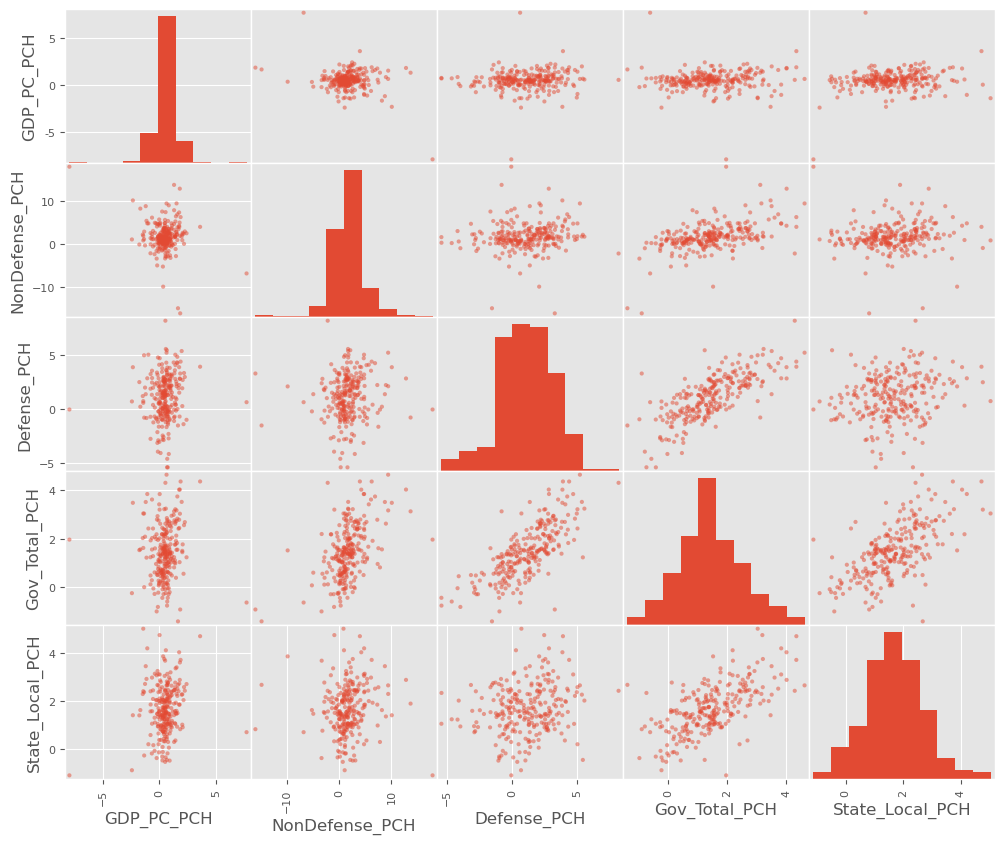

In [5]:
scatter_matrix(pct_change_gdp_gov, figsize=(12,10))

Text(0, 0.5, 'Billions of Dollars')

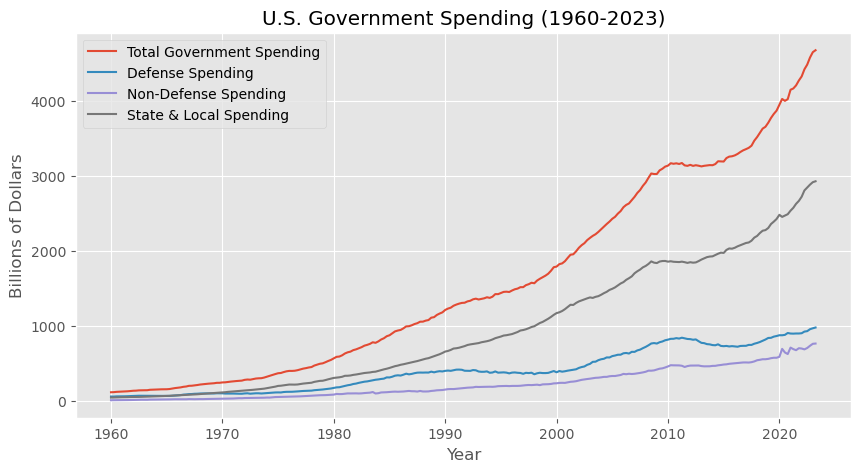

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
x=gdp_gov_spending['DATE']
total = gdp_gov_spending['Gov_Total']
defense = gdp_gov_spending['Defense']
nondefense = gdp_gov_spending['NonDefense']
state = gdp_gov_spending['State_Local']

ax.plot(x,total)
ax.plot(x,defense)
ax.plot(x,nondefense)
ax.plot(x, state)

ax.legend(['Total Government Spending','Defense Spending','Non-Defense Spending', 'State & Local Spending'])
ax.set_title('U.S. Government Spending (1960-2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Billions of Dollars')

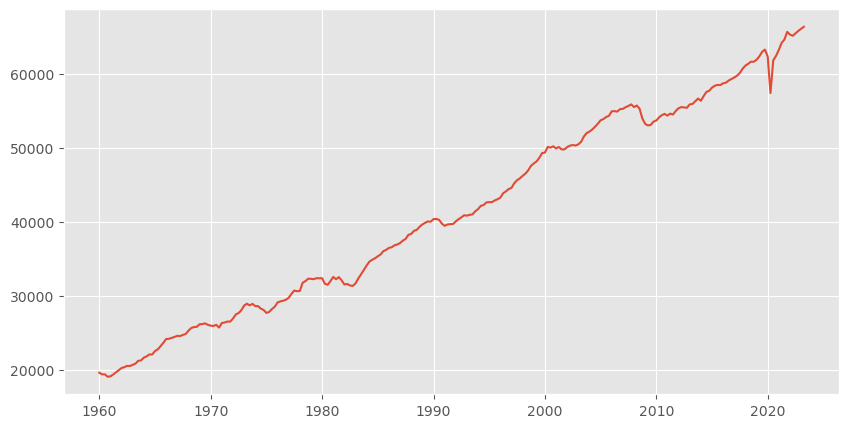

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
x=gdp_gov_spending['DATE']
gdp_per_cap = gdp_gov_spending['GDP_Per_Capita']
ax.plot(x,gdp_per_cap)
# ax2 = ax.twinx()


Text(0, 0.5, 'Percent Change')

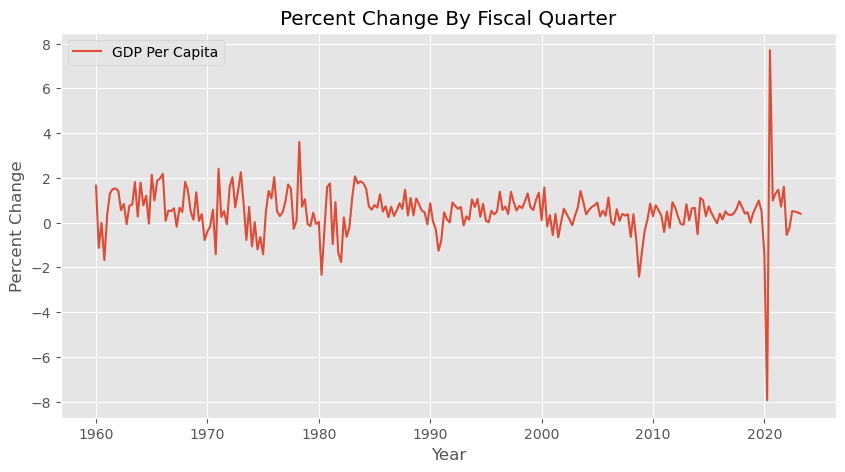

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
x2 = pct_change_gdp_gov['DATE']

gdp_pct = pct_change_gdp_gov['GDP_PC_PCH']
# total_pct = pct_change_gdp_gov['Gov_Total_PCH']
# defense_pct = pct_change_gdp_gov['Defense_PCH']
# nondefense_pct = pct_change_gdp_gov['NonDefense_PCH']
# state_pct = pct_change_gdp_gov['State_Local_PCH']

ax.plot(x2,gdp_pct)
# ax.plot(x2,total_pct)
# ax.plot(x2,defense_pct)
# ax.plot(x2,nondefense_pct)
# ax.plot(x2,state_pct)

ax.legend(['GDP Per Capita','Total Government Spending','Defense Spending','Non-Defense Spending', 'State & Local Spending'])
ax.set_title('Percent Change By Fiscal Quarter')
ax.set_xlabel('Year')
ax.set_ylabel('Percent Change')

Text(0, 0.5, 'Percent Change')

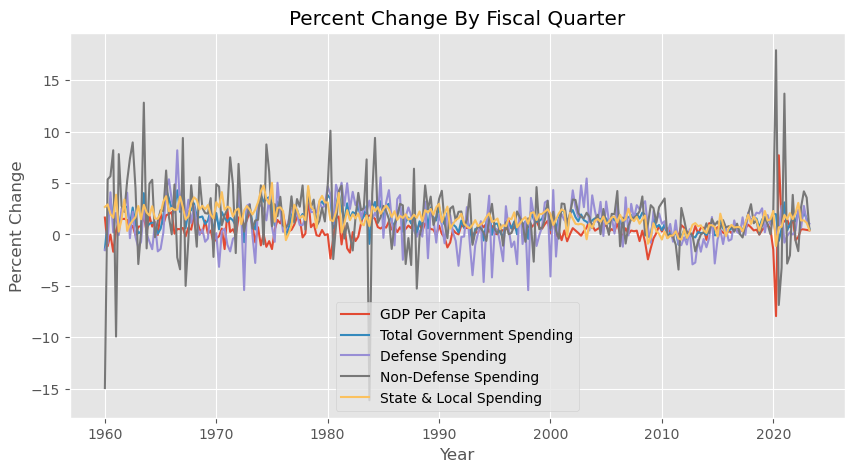

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
x2 = pct_change_gdp_gov['DATE']

gdp_pct = pct_change_gdp_gov['GDP_PC_PCH']
total_pct = pct_change_gdp_gov['Gov_Total_PCH']
defense_pct = pct_change_gdp_gov['Defense_PCH']
nondefense_pct = pct_change_gdp_gov['NonDefense_PCH']
state_pct = pct_change_gdp_gov['State_Local_PCH']

ax.plot(x2,gdp_pct)
ax.plot(x2,total_pct)
ax.plot(x2,defense_pct)
ax.plot(x2,nondefense_pct)
ax.plot(x2,state_pct)

ax.legend(['GDP Per Capita','Total Government Spending','Defense Spending','Non-Defense Spending', 'State & Local Spending'])
ax.set_title('Percent Change By Fiscal Quarter')
ax.set_xlabel('Year')
ax.set_ylabel('Percent Change')

Text(0, 0.5, 'Percent Change')

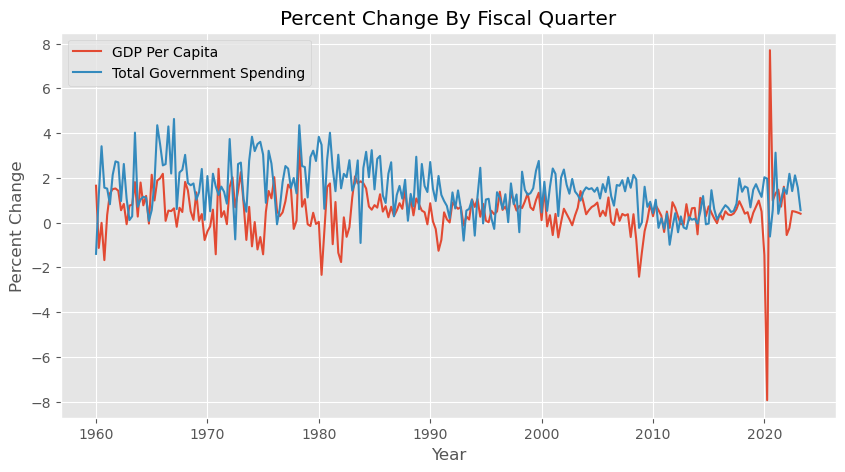

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
x2 = pct_change_gdp_gov['DATE']

gdp_pct = pct_change_gdp_gov['GDP_PC_PCH']
total_pct = pct_change_gdp_gov['Gov_Total_PCH']
# defense_pct = pct_change_gdp_gov['Defense_PCH']
# nondefense_pct = pct_change_gdp_gov['NonDefense_PCH']
# state_pct = pct_change_gdp_gov['State_Local_PCH']

ax.plot(x2,gdp_pct)
ax.plot(x2,total_pct)
# ax.plot(x2,defense_pct)
# ax.plot(x2,nondefense_pct)
# ax.plot(x2,state_pct)

ax.legend(['GDP Per Capita','Total Government Spending','Defense Spending','Non-Defense Spending', 'State & Local Spending'])
ax.set_title('Percent Change By Fiscal Quarter')
ax.set_xlabel('Year')
ax.set_ylabel('Percent Change')

Text(0, 0.5, 'Percent Change')

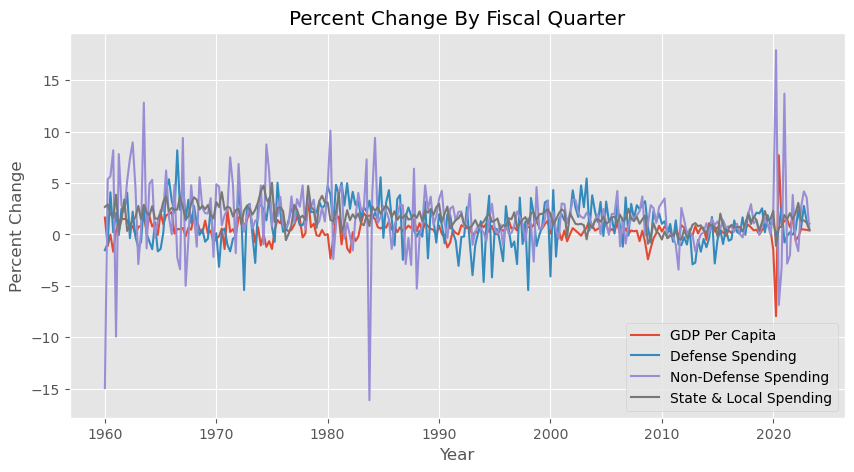

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
x2 = pct_change_gdp_gov['DATE']

gdp_pct = pct_change_gdp_gov['GDP_PC_PCH']
# total_pct = pct_change_gdp_gov['Gov_Total_PCH']
defense_pct = pct_change_gdp_gov['Defense_PCH']
nondefense_pct = pct_change_gdp_gov['NonDefense_PCH']
state_pct = pct_change_gdp_gov['State_Local_PCH']

ax.plot(x2,gdp_pct)
# ax.plot(x2,total_pct)
ax.plot(x2,defense_pct)
ax.plot(x2,nondefense_pct)
ax.plot(x2,state_pct)

ax.legend(['GDP Per Capita','Defense Spending','Non-Defense Spending', 'State & Local Spending'])
ax.set_title('Percent Change By Fiscal Quarter')
ax.set_xlabel('Year')
ax.set_ylabel('Percent Change')

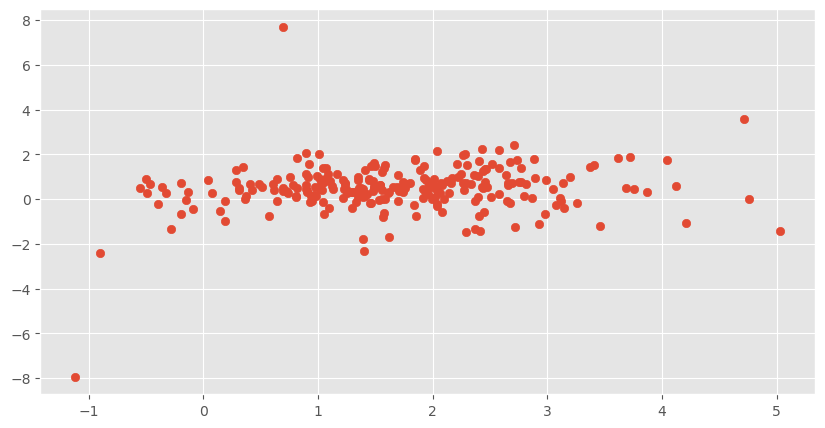

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
x2 = pct_change_gdp_gov['DATE']

gdp_pct = pct_change_gdp_gov['GDP_PC_PCH']
total_pct = pct_change_gdp_gov['Gov_Total_PCH']
defense_pct = pct_change_gdp_gov['Defense_PCH']
nondefense_pct = pct_change_gdp_gov['NonDefense_PCH']
state_pct = pct_change_gdp_gov['State_Local_PCH']

ax.scatter(state_pct,gdp_pct)
# ax.plot(x2,defense_pct)
# ax.plot(x2,nondefense_pct)
# ax.plot(x2,state_pct)

# ax.legend(['GDP Per Capita','Total Government Spending','Defense Spending','Non-Defense Spending', 'State & Local Spending'])
# ax.set_title('Percent Change By Fiscal Quarter')
# ax.set_xlabel('Year')
# ax.set_ylabel('Percent Change')

In [13]:
X = pct_change_gdp_gov[['Gov_Total_PCH']]
y = pct_change_gdp_gov['GDP_PC_PCH']

X = sm.add_constant(X)

simple_model = sm.OLS(y,X).fit()
simple_predictions = simple_model.predict(X)

print_simple_table = simple_model.summary()
print(print_simple_table)

                            OLS Regression Results                            
Dep. Variable:             GDP_PC_PCH   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5001
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.480
Time:                        07:47:02   Log-Likelihood:                -376.82
No. Observations:                 254   AIC:                             757.6
Df Residuals:                     252   BIC:                             764.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4299      0.112      3.847

In [14]:
X2 = pct_change_gdp_gov[['Defense_PCH','NonDefense_PCH','State_Local_PCH']]
y2 = pct_change_gdp_gov['GDP_PC_PCH']

X2 = sm.add_constant(X2)

multi_model = sm.OLS(y2,X2).fit()
multi_predictions = multi_model.predict(X2)

print_multi_table = multi_model.summary()
print(print_multi_table)

                            OLS Regression Results                            
Dep. Variable:             GDP_PC_PCH   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7.610
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           6.88e-05
Time:                        07:47:03   Log-Likelihood:                -365.98
No. Observations:                 254   AIC:                             740.0
Df Residuals:                     250   BIC:                             754.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2969      0.126     

In [15]:
coeffs = multi_model.params
coeffs[1]
type(coeffs)

pandas.core.series.Series

# Monetary Analysis of Spending on GDP; No Transformation

In [16]:
X3 = gdp_gov_spending[['Defense','NonDefense','State_Local']]
y3 = gdp_gov_spending['GDP_Per_Capita']

X3 = sm.add_constant(X3)

money_model = sm.OLS(y3,X3).fit()
money_predictions = money_model.predict(X3)

print_money_table = money_model.summary()
print(print_money_table)

                            OLS Regression Results                            
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2493.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          6.80e-186
Time:                        07:47:03   Log-Likelihood:                -2341.7
No. Observations:                 254   AIC:                             4691.
Df Residuals:                     250   BIC:                             4705.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.416e+04    333.878     72.356      

In [17]:
gdp_gov_spending.columns

Index(['DATE', 'GDP_Per_Capita', 'NonDefense', 'Defense', 'Gov_Total',
       'State_Local'],
      dtype='object')

In [18]:
gdp_gov_spending

,DATE,GDP_Per_Capita,NonDefense,Defense,Gov_Total,State_Local
0,1960-01-01,19614.0,10.957,60.024,116.951,45.970
1,1960-04-01,19392.0,11.544,59.522,118.380,47.314
2,1960-07-01,19390.0,12.198,61.963,122.419,48.258
3,1960-10-01,19065.0,13.197,62.094,124.330,49.039
4,1961-01-01,19130.0,11.888,63.393,126.218,50.936
...,...,...,...,...,...,...
249,2022-04-01,65127.0,687.739,924.526,4415.676,2803.411
250,2022-07-01,65462.0,705.922,930.402,4477.855,2841.530
251,2022-10-01,65783.0,735.533,956.233,4572.408,2880.642
252,2023-01-01,66078.0,761.926,968.723,4643.890,2913.242


In [19]:
log_gdp_gov_spending = gdp_gov_spending.copy()
log_gdp_gov_spending['GDP_Per_Capita'] = np.log(log_gdp_gov_spending['GDP_Per_Capita'])
log_gdp_gov_spending['NonDefense'] = np.log(log_gdp_gov_spending['NonDefense'])
log_gdp_gov_spending['Defense'] = np.log(log_gdp_gov_spending['Defense'])
log_gdp_gov_spending['Gov_Total'] = np.log(log_gdp_gov_spending['Gov_Total'])
log_gdp_gov_spending['State_Local'] = np.log(log_gdp_gov_spending['State_Local'])
log_gdp_gov_spending

,DATE,GDP_Per_Capita,NonDefense,Defense,Gov_Total,State_Local
0,1960-01-01,9.883999,2.393979,4.094744,4.761755,3.827989
1,1960-04-01,9.872616,2.446166,4.086346,4.773900,3.856806
2,1960-07-01,9.872513,2.501272,4.126537,4.807450,3.876562
3,1960-10-01,9.855609,2.579990,4.128649,4.822939,3.892616
4,1961-01-01,9.859013,2.475529,4.149353,4.838011,3.930570
...,...,...,...,...,...,...
249,2022-04-01,11.084094,6.533409,6.829281,8.392916,7.938592
250,2022-07-01,11.089225,6.559505,6.835617,8.406899,7.952098
251,2022-10-01,11.094117,6.600595,6.863002,8.427795,7.965768
252,2023-01-01,11.098591,6.635849,6.875979,8.443308,7.977022


In [20]:

X4 = gdp_gov_spending[['Defense','NonDefense','State_Local']]
y4 = log_gdp_gov_spending['GDP_Per_Capita']

X4 = sm.add_constant(X4)

log_model = sm.OLS(y4,X4).fit()
log_predictions = log_model.predict(X4)

print_log_table = log_model.summary()
print(print_log_table)

                            OLS Regression Results                            
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     898.5
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.52e-133
Time:                        07:47:03   Log-Likelihood:                 219.42
No. Observations:                 254   AIC:                            -430.8
Df Residuals:                     250   BIC:                            -416.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.1054      0.014    724.376      

In [21]:
X5 = gdp_gov_spending[['Gov_Total']]
y5 = gdp_gov_spending['GDP_Per_Capita']

X5 = sm.add_constant(X5)

simple_money_model = sm.OLS(y5,X5).fit()
simple_money_predictions = simple_money_model.predict(X5)

print_simple_money_table = simple_money_model.summary()
print(print_simple_money_table)

                            OLS Regression Results                            
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4340.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          7.61e-161
Time:                        07:47:03   Log-Likelihood:                -2408.8
No. Observations:                 254   AIC:                             4822.
Df Residuals:                     252   BIC:                             4829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    318.223     78.818      0.0

In [22]:
X5 = gdp_gov_spending[['Gov_Total']]
y5 = log_gdp_gov_spending['GDP_Per_Capita']

X5 = sm.add_constant(X5)

simple_money_model = sm.OLS(y5,X5).fit()
simple_money_predictions = simple_money_model.predict(X5)

print_simple_money_table = simple_money_model.summary()
print(print_simple_money_table)

                            OLS Regression Results                            
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1669.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          3.80e-113
Time:                        07:47:03   Log-Likelihood:                 164.13
No. Observations:                 254   AIC:                            -324.3
Df Residuals:                     252   BIC:                            -317.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1690      0.013    801.286      0.0

## Need to write a function that takes the coefficients and transforms them into a legible interpretation of the results!

In [23]:
# fig, ax = plt.subplots(figsize=(10,5))
# x=log_gdp_gov_spending['DATE']
# total = log_gdp_gov_spending['Gov_Total']
# defense = log_gdp_gov_spending['Defense']
# nondefense = log_gdp_gov_spending['NonDefense']
# state = log_gdp_gov_spending['State_Local']
# gdp = log_gdp_gov_spending['GDP_Per_Capita']

# ax.plot(x,total)
# ax.plot(x,defense)
# ax.plot(x,nondefense)
# ax.plot(x, state)
# # ax.plot(x,gdp)


# ax.legend(['Log(Total Government Spending)','Log(Defense Spending)','Log(Non-Defense Spending)', 'Log(State & Local Spending)','Log(GDP Per Capita)'])
# ax.set_title('U.S. Government Spending (1960-2023) - Log Transformed')
# ax.set_xlabel('Year')
# ax.set_ylabel('Log(Billions of Dollars)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Billions of Dollars')

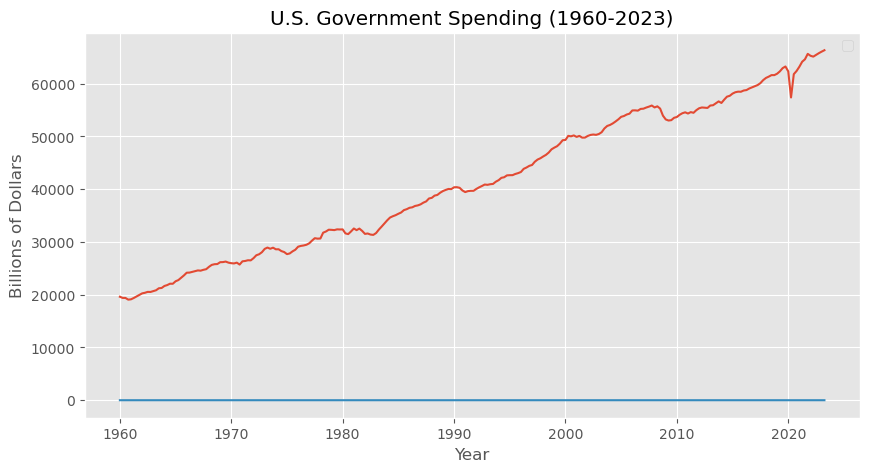

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
x=gdp_gov_spending['DATE']
gdp=gdp_gov_spending['GDP_Per_Capita']
# total = gdp_gov_spending['Gov_Total']
# defense = gdp_gov_spending['Defense']
# nondefense = gdp_gov_spending['NonDefense']
# state = gdp_gov_spending['State_Local']

ax.plot(x,gdp)
ax.plot(x,simple_predictions)



# ax2 = ax.twinx()
# ax2.plot(x,gdp_gov_spending['GDP_Per_Capita'])

ax.legend()
ax.set_title('U.S. Government Spending (1960-2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Billions of Dollars')